[View in Colaboratory](https://colab.research.google.com/github/guilgautier/DPPy/blob/docs/notebooks/Tuto_DPPy.ipynb)

# Why are we here ?
---

## DPPy
  + Acronym: DPP + Python
  + Python Toolbox for (sampling) DPPs
 
## Goal
  + showcase the DPP samplers featured in DPPy
  + present tools behind the scene 
  
  [GitHub](https://github.com/guilgautier/DPPy)
  [![Documentation Status](https://readthedocs.org/projects/dppy/badge/?version=latest)](https://dppy.readthedocs.io/en/latest/?badge=latest)
  [![Build Status](https://travis-ci.com/guilgautier/DPPy.svg?branch=master)](https://travis-ci.com/guilgautier/DPPy)
  + needs/suggestion for improvement

# Program of the day
---

## I.   Check installation
## II.   Sample DPPs with DPPy
## III.   Tools behind the scene
## IV.   Suggestions/needs

# I. Check installation
---

[Instructions](https://github.com/guilgautier/DPPy#installation)

### Any issue?

- [Travis](https://travis-ci.com/guilgautier/DPPy) says **no** :-)
    [![Build Status](https://travis-ci.com/guilgautier/DPPy.svg?branch=master)](https://travis-ci.com/guilgautier/DPPy)




In [0]:
#@title ## Who is *using*:

GitHub = 1 #@param {type:"slider", min:0, max:20, step:1}
git = 1 #@param {type:"slider", min:0, max:20, step:1}
none = 0 #@param {type:"slider", min:0, max:20, step:1}


### Ready?

```bash
(cd DPPy)
jupyter notebook
```

In [1]:
!rm -r DPPy
!git clone https://github.com/guilgautier/DPPy.git

Cloning into 'DPPy'...
remote: Enumerating objects: 1243, done.
remote: Total 1243 (delta 0), reused 0 (delta 0), pack-reused 1243
Receiving objects: 100% (1243/1243), 899.67 KiB | 2.75 MiB/s, done.
Resolving deltas: 100% (823/823), done.


In [3]:
!pip install scipy --upgrade
!pip install DPPy/.

Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.1.0)
Processing ./DPPy
  Running setup.py bdist_wheel for DPPy ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-48wlirzq/wheels/a4/c2/e9/0bb98517290e8f180da7721c509fedd2122dcb37de642c215b
Successfully built DPPy
  Found existing installation: DPPy 0.1.0.dev0
    Uninstalling DPPy-0.1.0.dev0:
      Successfully uninstalled DPPy-0.1.0.dev0


# II. Sample DPPs with DPPy
----

## 1. Continuous DPPs: $\beta$-Ensembles
  + Hermite, Laguerre, Jacobi, Circular, Ginibre
  + matrix models (full/tridiagonal)

## 2. Finite DPPs

  + exact sampling
  + approximate sampling

## 3. Exotic DPPs
  + Uniform Spanning Trees
  + Plancherel (RSK, ...)
  + Descent Processes

## Main DPPy objects' methods

#### `.sample()`
#### `.plot()`

## II. 1. Continuous DPPs: $\beta$-Ensembles

### See [documentation](https://dppy.readthedocs.io/en/latest/continuous_dpps/index.html)

$$
(x_1,\dots,x_N) 
	\sim 
		\frac{1}{Z_{N,\beta}}
		\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
		\prod_{i= 1}^N 
			\mu(d x_i)
$$

- Random matrix models
- $\beta=2$: projection DPPs

In [0]:
from dppy.beta_ensembles import *

$$
(x_1,\dots,x_N) 
	\sim 
		\frac{1}{Z_{N,\beta}}
		\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
		\prod_{i= 1}^N 
			\mu(d x_i)
$$

- Random matrix models
- $\beta=2$: projection DPPs


### d. Circular

In [0]:
circular = BetaEnsemble("circular", beta=2)

#### Visualization of the cristallization as $\beta$ increases

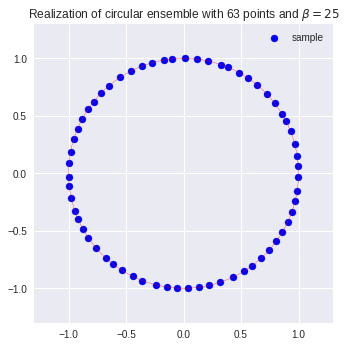

In [7]:
#@title ##### Use a slider!

_beta = 25 #@param {type:"slider", min:0, max:100, step:1}
_size = 63 #@param {type:"slider", min:0, max:100, step:1}

circular.beta = _beta
banded_params = {"size":_size}
circular.sample("banded", **banded_params)
circular.plot()

##### Or simply a loop

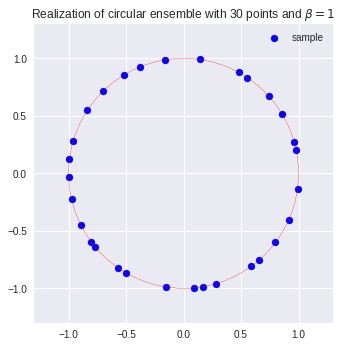

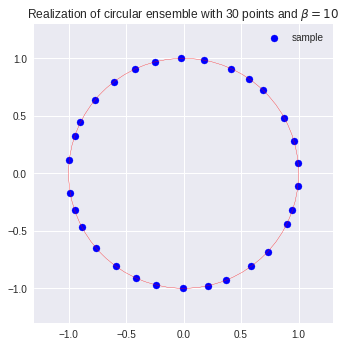

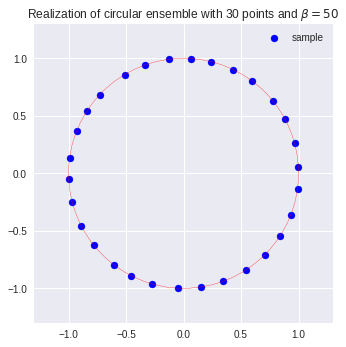

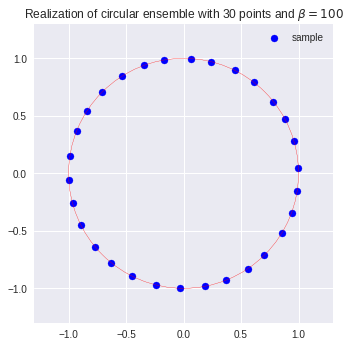

In [8]:
banded_params = {"size":30}
for _beta in (1, 10, 50, 100):
  circular.beta = _beta
  circular.sample("banded", **banded_params)
  circular.plot()

#### Sample using full matrix model

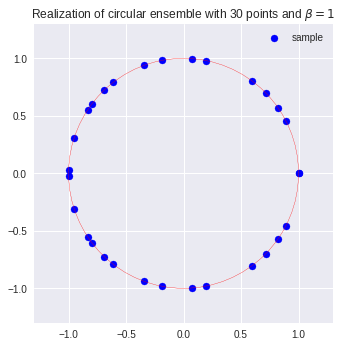

In [9]:
circular.beta = 1
full_params = {"N":30, "haar_mode":"QR"}
circular.sample("full", **full_params)
circular.plot()

#### Sample using banded (tridiagonal) matrix model

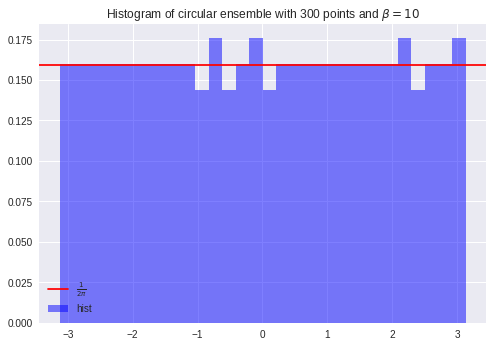

In [10]:
circular.beta = 10
banded_params = {"size":300}
circular.sample("banded", **banded_params)
circular.hist()

### a. Hermite $\mu = \mathcal{N}$

In [0]:
hermite = BetaEnsemble("hermite", beta=2)

#### Sample using full matrix model

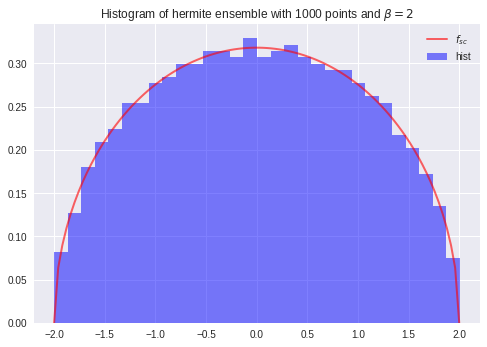

In [12]:
full_params = {"N":1000}
hermite.sample("full", **full_params)
hermite.hist()

#### Sample using banded (tridiagonal) matrix model

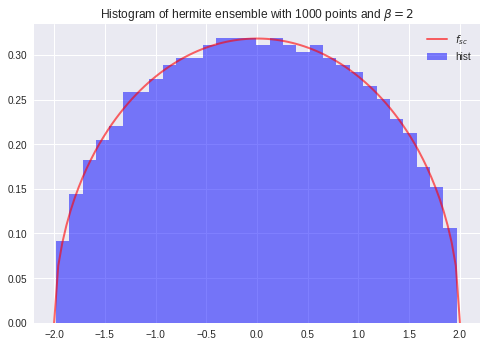

In [13]:
banded_params = {"loc":0.0, "scale":np.sqrt(2), "size":1000}
hermite.sample("banded", **banded_params)
hermite.hist()


### b. Laguerre $\mu = \mathcal{\Gamma}$

In [0]:
laguerre = BetaEnsemble("laguerre", beta=2)

#### Sample using full matrix model

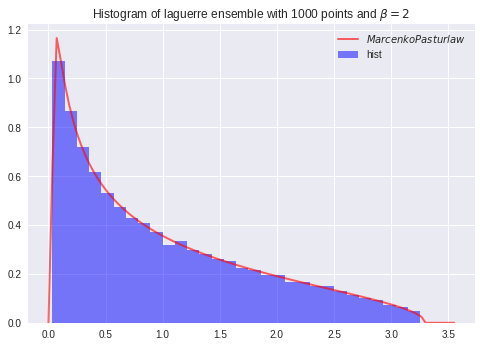

In [15]:
full_params = {"M":1500, "N":1000}
laguerre.sample("full", **full_params)
laguerre.hist()

#### Sample using banded (tridiagonal) matrix model

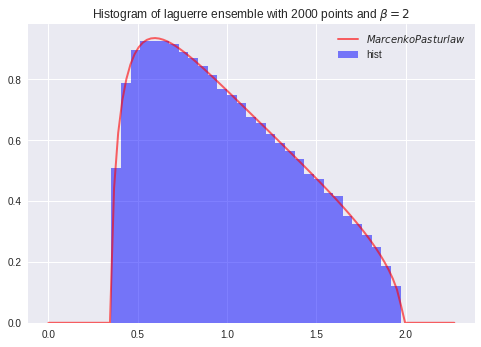

In [16]:
banded_params = {"shape":10000, "scale":2.0, "size":2000}
laguerre.sample("banded", **banded_params)
laguerre.hist()

### c. Jacobi $\mu = \operatorname{Beta}$

In [0]:
jacobi = BetaEnsemble("jacobi", beta=2)

#### Sample using full matrix model

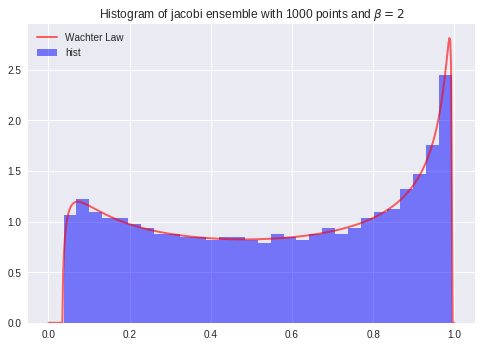

In [18]:
full_params = {"M_1":1500, "M_2":1200, "N":1000}
jacobi.sample("full", **full_params)
jacobi.hist()

#### Sample using banded (tridiagonal) matrix model

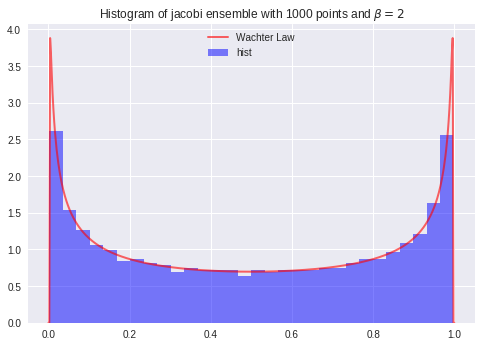

In [19]:
banded_params = {"a":100, "b":100, "size":1000} 
jacobi.sample("banded", **banded_params)
jacobi.hist()

## II. 2. Discrete DPPs

### See [documentation](https://dppy.readthedocs.io/en/latest/finite_dpps/index.html)

In [0]:
from dppy.finite_dpps import *

### Build inclusion kernel $\mathbf{K}$

$\operatorname{DPP}(\mathbf{K})$, with $\mathbf{K}\in\mathbb{R}^{N\times N}$ 

$$
	\mathbf{K} = \sum_{n=1}^{N} \lambda_n u_n u_n^{\top}
$$

In [0]:
r, N = 10, 10 #

# Random orthogonal vectors
A = np.random.randn(r, N)
eig_vecs, _ = la.qr(A.T, mode="economic")
# Random eigenvalues
eig_vals = np.random.rand(r) # 0< <1
#eig_vals = np.random.choice([0.0, 1.0], size=r)# 0 or 1 i.e. projection

K = eig_vecs*eig_vals @ eig_vecs.T

### Declare a finite DPP in DPPy

#### 1. Via eigen-decomposition

In [0]:
DPP = FiniteDPP("inclusion", **{"K_eig_dec":(eig_vals, eig_vecs)})
#print(DPP.K)

#### 2. Via its kernel

In [0]:
DPP = FiniteDPP("inclusion", **{"K":K})

### Exact sampling scheme

- $\operatorname{DPP}(\mathbf{K})$, with $\mathbf{K}\in\mathbb{R}^{N\times N}$ 

$$
	\mathbf{K} = \sum_{n=1}^{N} \lambda_n u_n u_n^{\top}
$$

1. Draw independent $\operatorname{\mathcal{B}er}(\lambda_n)$ for each eigenvector $u_n$ and store the selected ones in $\tilde{U}$.
2. Sample from the corresponding *projection* $\operatorname{DPP}(\tilde{U}\tilde{U}^{\top})$.

In [24]:
# Sample
for _ in range(10):
  DPP.sample_exact()

DPP.list_of_samples

[[9, 8, 4, 7, 1, 2],
 [1, 8, 4, 6, 9],
 [8, 2, 1, 4, 9, 7],
 [6, 7, 2, 4],
 [2, 9, 8, 0, 4, 6, 1],
 [6, 2, 8, 1, 4, 7],
 [4, 5, 6, 7, 9, 0, 1, 2],
 [2, 6, 1, 8, 9],
 [5, 7, 2, 4, 0, 8, 6],
 [0, 2, 1, 5, 7, 4]]

In [25]:
DPP.flush_samples()
DPP.list_of_samples

[]

### Other features


#### a. Compute the *other* kernel 
- $L=K(I-K)^{-1}$

In [26]:
DPP = FiniteDPP("inclusion", **{"K_eig_dec":(eig_vals, eig_vecs)})
print(DPP.L)
DPP.compute_L()

None
L (marginal) kernel computed via:
- eig_L = eig_K/(1-eig_K)
- U diag(eig_L) U.T


- $K=L(I+L)^{-1}$

In [27]:
eig_vals = 4*np.random.rand(r) # >=0
DPP = FiniteDPP("marginal", **{"L_eig_dec":(eig_vals, eig_vecs)})
print(DPP.L)
DPP.compute_K()

None
K (inclusion) kernel computed via:
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T


#### b. Compute/plot the underlying kernel


K (inclusion) kernel computed via:
- U diag(eig_K) U.T


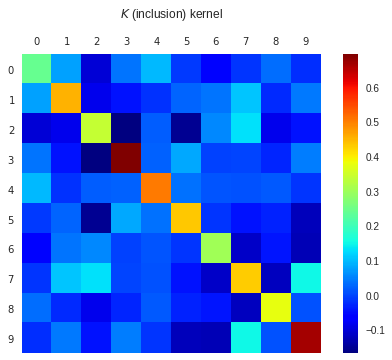

In [28]:
eig_vals = np.random.rand(r) # 0< <1
DPP = FiniteDPP("inclusion", **{"K_eig_dec":(eig_vals, eig_vecs)})
DPP.plot_kernel()

## II. 3. Exotic DPPs
### See [documentation](https://dppy.readthedocs.io/en/latest/exotic_dpps/index.html)

- Uniform spanning trees
- Plancherel
- Descent Processes

In [6]:
from dppy.exotic_dpps import *

### a. Uniform Spanning Trees

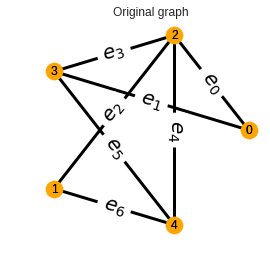

In [13]:
g = nx.Graph()
edges = [(0,2), (0,3), (1,2), (1,4), (2,3), (2,4), (3,4)]
g.add_edges_from(edges)

ust = UST(g)

ust.plot_graph()

#### Display kernel

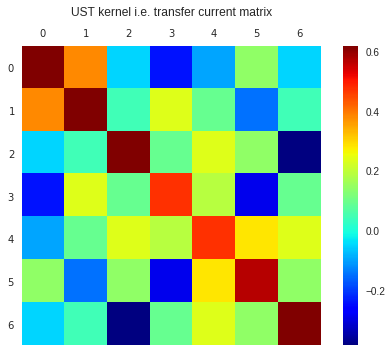

In [14]:
ust.compute_kernel()
ust.plot_kernel()

#### Sample a UST

In [0]:
for md in ('Aldous-Broder', 'Wilson', 'DPP_exact'):
    ust.sample(md); ust.plot()

# III. Tools behind the scene

---


 - Host collaborative project [GitHub](https://github.com/guilgautier/DPPy)
 - Documentation [![Documentation Status](https://readthedocs.org/projects/dppy/badge/?version=latest)](https://dppy.readthedocs.io/en/latest/?badge=latest)
 - Continuous integration [![Build Status](https://travis-ci.com/guilgautier/DPPy.svg?branch=master)](https://travis-ci.com/guilgautier/DPPy)
 
 
 #### Reproducible reasearch
 - [DPPy](https://github.com/guilgautier/DPPy)
 - companion paper [DPPy_paper](https://github.com/guilgautier/DPPy_paper)

# IV.   Suggestions/needs?

---


*   
*
*
*
*
*   
*
*
*
*